In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,...,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,Ecchi,AiredYear,Duration_mins
0,0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,...,False,False,True,False,False,False,False,False,1998,24
1,2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,...,False,False,True,False,False,False,False,False,1998,24
2,3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,...,True,False,False,False,False,True,False,False,2002,25
3,4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,...,False,False,False,False,False,True,False,False,2004,23
4,5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145,...,False,False,False,False,True,False,False,False,2005,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4281 non-null   int64  
 1   anime_id       4281 non-null   int64  
 2   Name           4281 non-null   object 
 3   English name   4281 non-null   object 
 4   Other name     4281 non-null   object 
 5   Score          4281 non-null   float64
 6   Genres         4281 non-null   object 
 7   Synopsis       4281 non-null   object 
 8   Type           4281 non-null   object 
 9   Episodes       4281 non-null   int64  
 10  Aired          4281 non-null   object 
 11  Status         4281 non-null   object 
 12  Producers      4281 non-null   object 
 13  Licensors      4281 non-null   object 
 14  Studios        4281 non-null   object 
 15  Source         4281 non-null   object 
 16  Duration       4281 non-null   object 
 17  Rating         4281 non-null   object 
 18  Rank    

### Analysis of Categorial Variables

In [4]:
catdf=pd.DataFrame()
for i in df:
    if df[i].dtypes=='object':
        catdf[i]=df[i]
catdf=catdf.drop(columns=['Name','English name','Other name','Image URL','Synopsis','Aired','Genres','Duration'])
catdf

,Type,Status,Producers,Licensors,Studios,Source,Rating
0,TV,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity)
1,TV,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older
2,TV,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older
3,TV,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,PG - Children
4,TV,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,PG-13 - Teens 13 or older
...,...,...,...,...,...,...,...
4276,TV,Currently Airing,"Pierrot, Sony Pictures Entertainment, Square E...",UNKNOWN,Studio Signpost,Manga,PG-13 - Teens 13 or older
4277,TV,Currently Airing,"Studio Hibari, Lantis, Good Smile Company, Egg...",UNKNOWN,Lerche,Mixed media,PG-13 - Teens 13 or older
4278,TV,Finished Airing,TV Tokyo,UNKNOWN,OLM,Game,PG - Children
4279,TV,Currently Airing,"Mainichi Broadcasting System, NBCUniversal Ent...",UNKNOWN,Satelight,Manga,PG-13 - Teens 13 or older


In [5]:
for col in catdf:
    print(f'=============== {col} ===============')
    print("Types of Categories :", len(catdf[col].unique()))
    print(catdf[col].value_counts())
    print()
    

=============== Type ===============
Types of Categories : 1
Type
TV    4281
Name: count, dtype: int64

=============== Status ===============
Types of Categories : 2
Status
Finished Airing     4242
Currently Airing      39
Name: count, dtype: int64

=============== Producers ===============
Types of Categories : 2525
Producers
UNKNOWN                                                                                                                                       658
TV Tokyo                                                                                                                                       59
Fuji TV                                                                                                                                        49
NHK                                                                                                                                            39
TV Asahi                                                                              

we can ignore 'Type' because it is singly catagorised

In [6]:
catdf=catdf.drop(columns=['Type'])

C:\Users\MsNai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\MsNai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\MsNai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


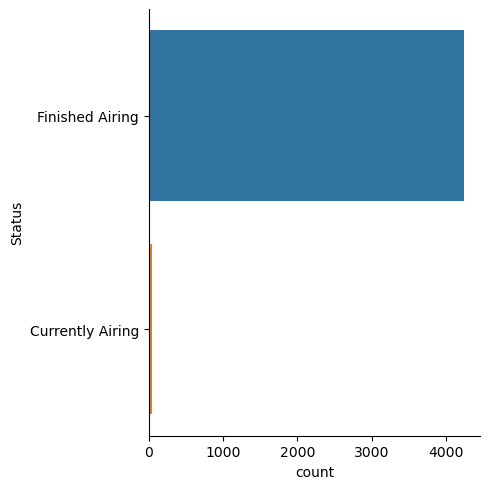

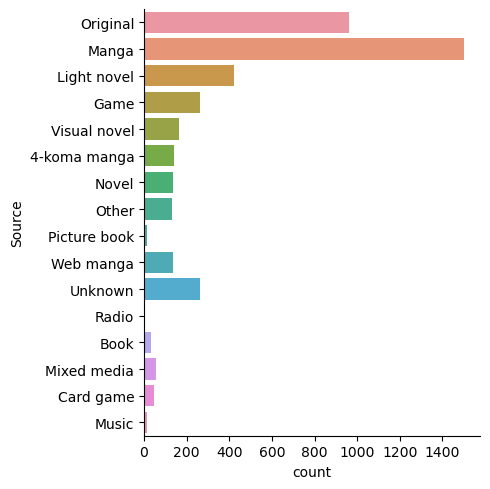

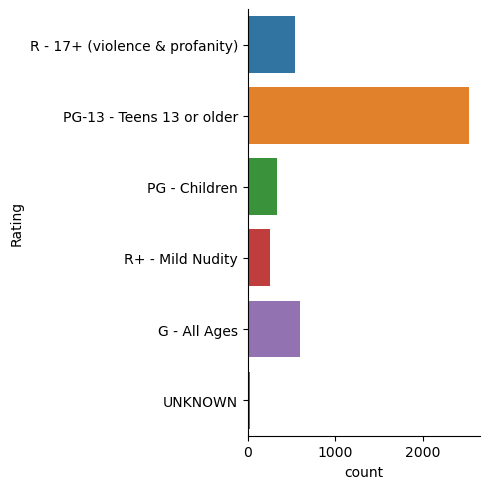

In [13]:
sb.catplot(y = "Status", data = catdf, kind = "count", height = 5)
sb.catplot(y = "Source", data = catdf, kind = "count", height = 5)
sb.catplot(y = "Rating", data = catdf, kind = "count", height = 5)

C:\Users\MsNai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


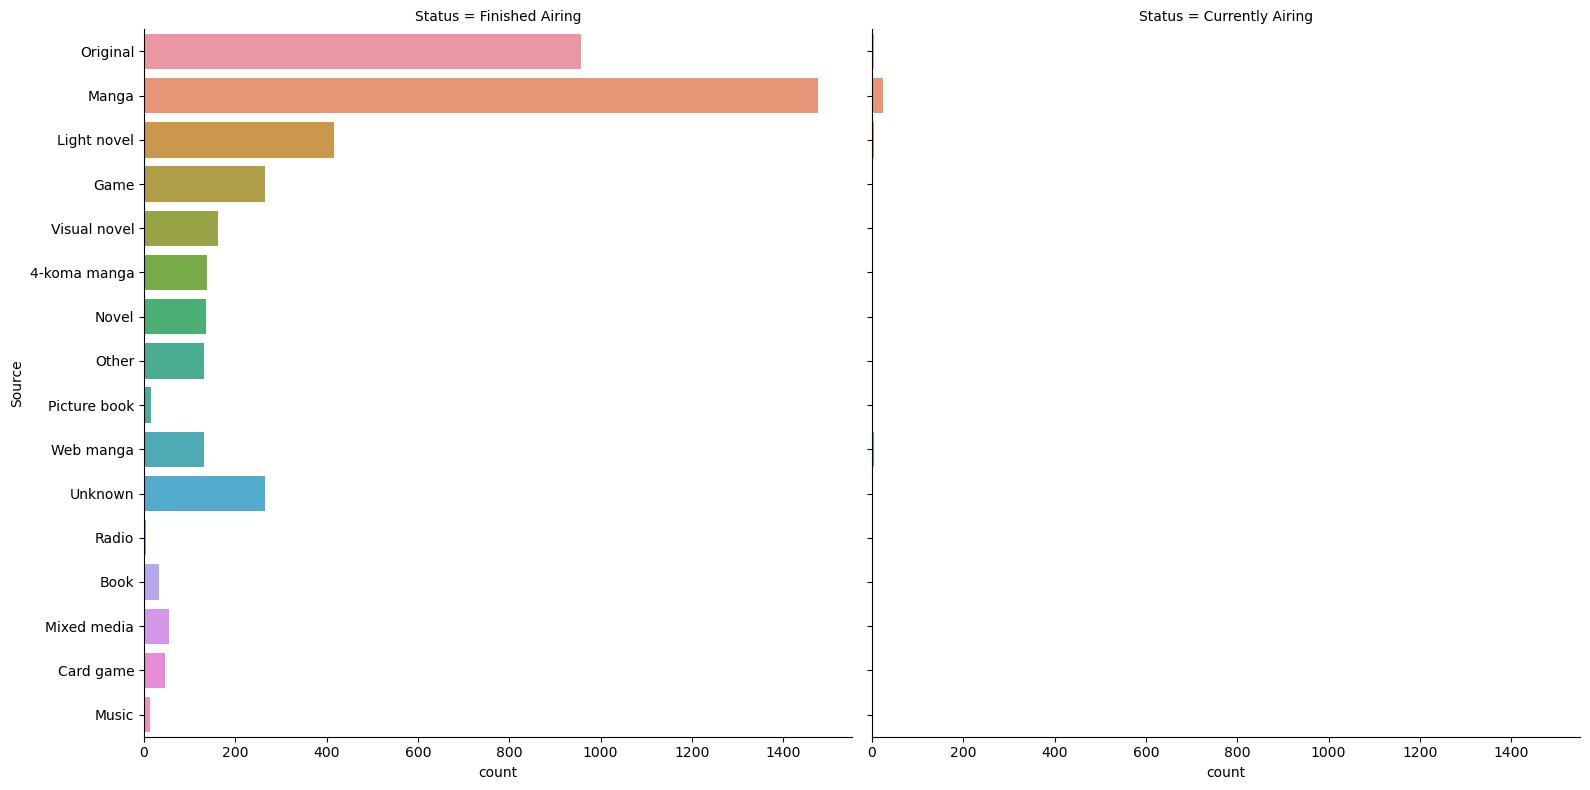

In [8]:
# Source of anime over Status
sb.catplot(y = 'Source', data = catdf, col = 'Status', kind = 'count', col_wrap = 2, height = 8)

In [ ]:
sb.catplot(y = col, data = catdf, kind="count")
plt.title(f"Catplot for {col}")
plt.show()

### Analysis of Numeric Variables


In [15]:
numdf=pd.DataFrame()
for i in df:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        numdf[i]=df[i]
numdf=numdf.drop(columns=['Unnamed: 0'])
numdf

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members,season,Premier_Month,AiredYear,Duration_mins
0,1,8.75,26,41,43,78525,914193,1771505,1,1179,1998,24
1,6,8.22,26,328,246,15035,356739,727252,1,1179,1998,24
2,7,7.25,26,2764,1795,613,42829,111931,2,1230,2002,25
3,8,6.94,52,4240,5126,14,6413,15001,3,1257,2004,23
4,15,7.92,145,688,1252,1997,86524,177688,1,1263,2005,23
...,...,...,...,...,...,...,...,...,...,...,...,...
4276,53621,7.47,13,1812,3074,178,9360,44954,1,1479,2023,23
4277,53698,6.72,12,5256,6339,39,1453,8943,1,1479,2023,24
4278,53874,7.56,11,1517,4673,128,7808,19087,0,1476,2023,24
4279,54259,6.19,12,7922,3626,78,6247,32829,1,1479,2023,23


In [72]:
numdf.describe().round(2)

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members,season,Premier_Month,AiredYear,Duration_mins
count,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00
mean,18771.52,6.89,29.06,4723.65,4629.42,2148.06,83533.26,161782.98,1.55,1301.47,2008.06,21.35
std,16940.81,0.80,61.53,3165.26,3948.59,9585.19,201975.42,330540.43,1.12,149.37,12.47,6.49
min,1.00,2.90,2.00,1.00,1.00,1.00,113.00,405.00,0.00,735.00,1961.00,1.00
25%,2727.00,6.38,12.00,2046.00,1355.00,14.00,2172.00,6353.00,1.00,1239.00,2003.00,23.00
50%,12293.00,6.91,13.00,4336.00,3454.00,111.00,13524.00,36671.00,1.00,1344.00,2012.00,24.00
75%,34888.00,7.41,26.00,6955.00,7263.00,778.00,69778.00,161732.00,3.00,1413.00,2017.00,24.00
max,54738.00,9.10,1787.00,12689.00,15842.00,217606.00,2660903.00,3744541.00,3.00,1479.00,2023.00,51.00


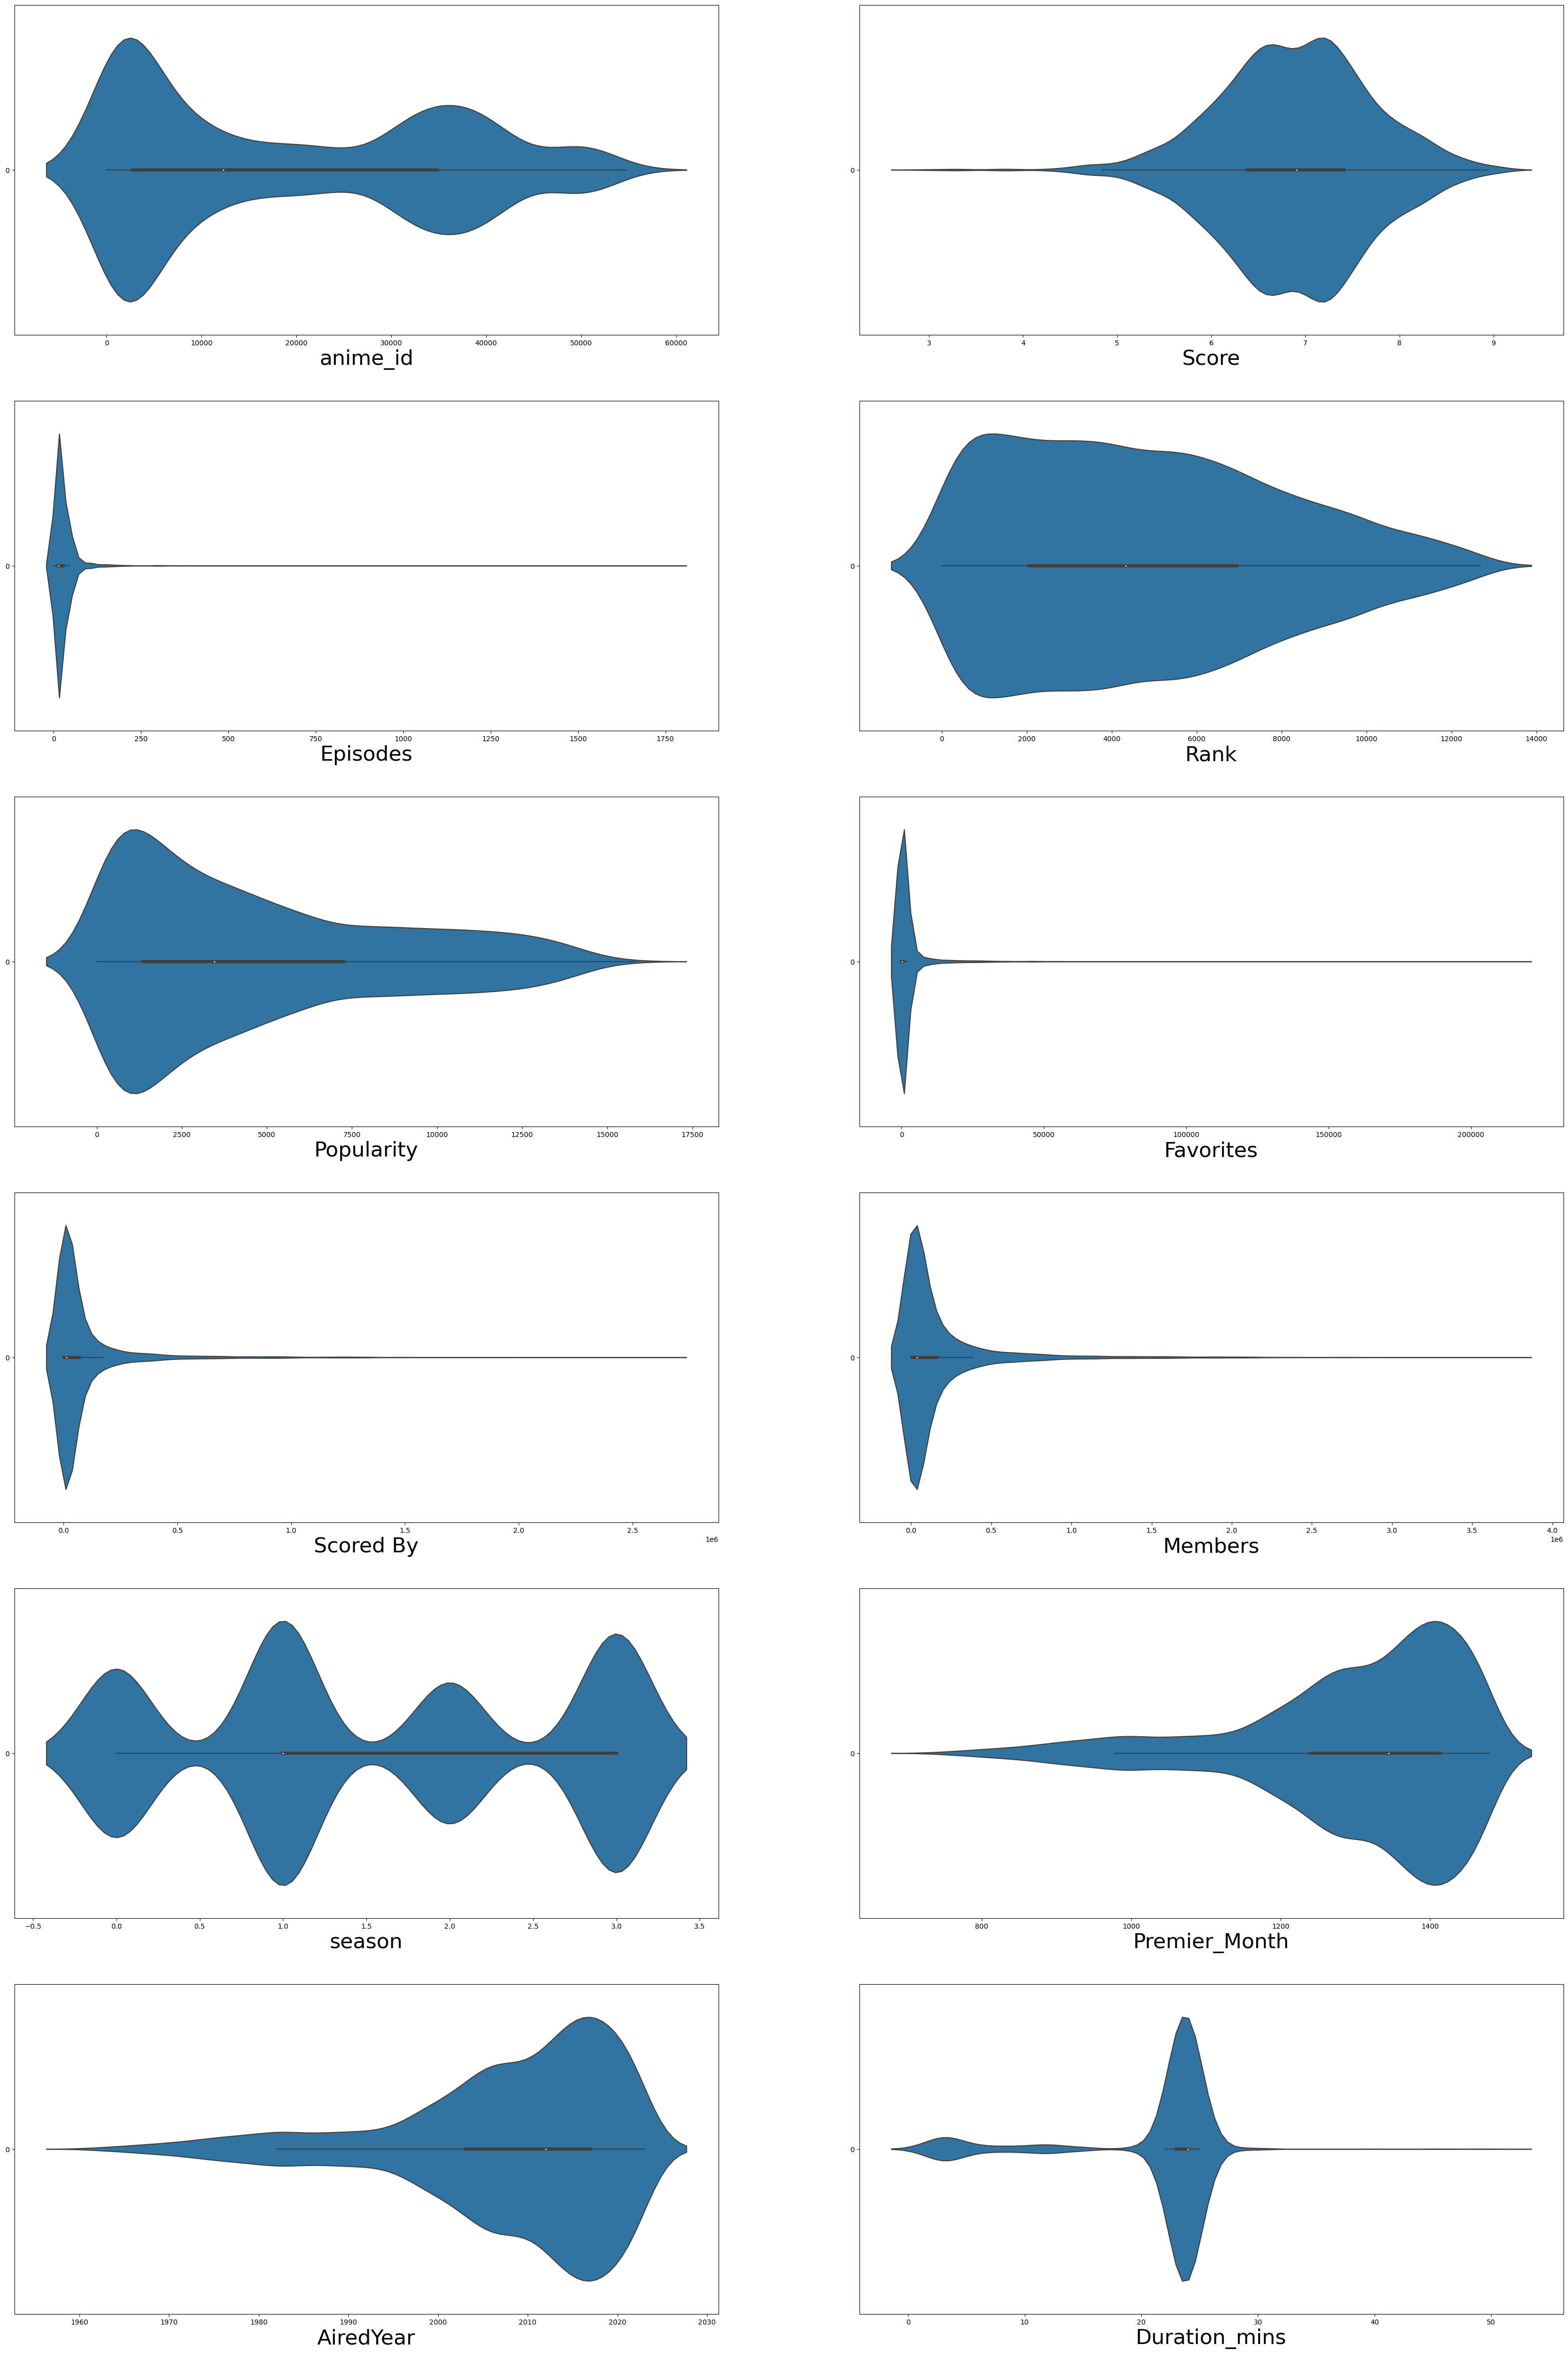

In [74]:
f, axes = plt.subplots(6,2,figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in numdf.columns]
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numdf[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

C:\Users\MsNai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


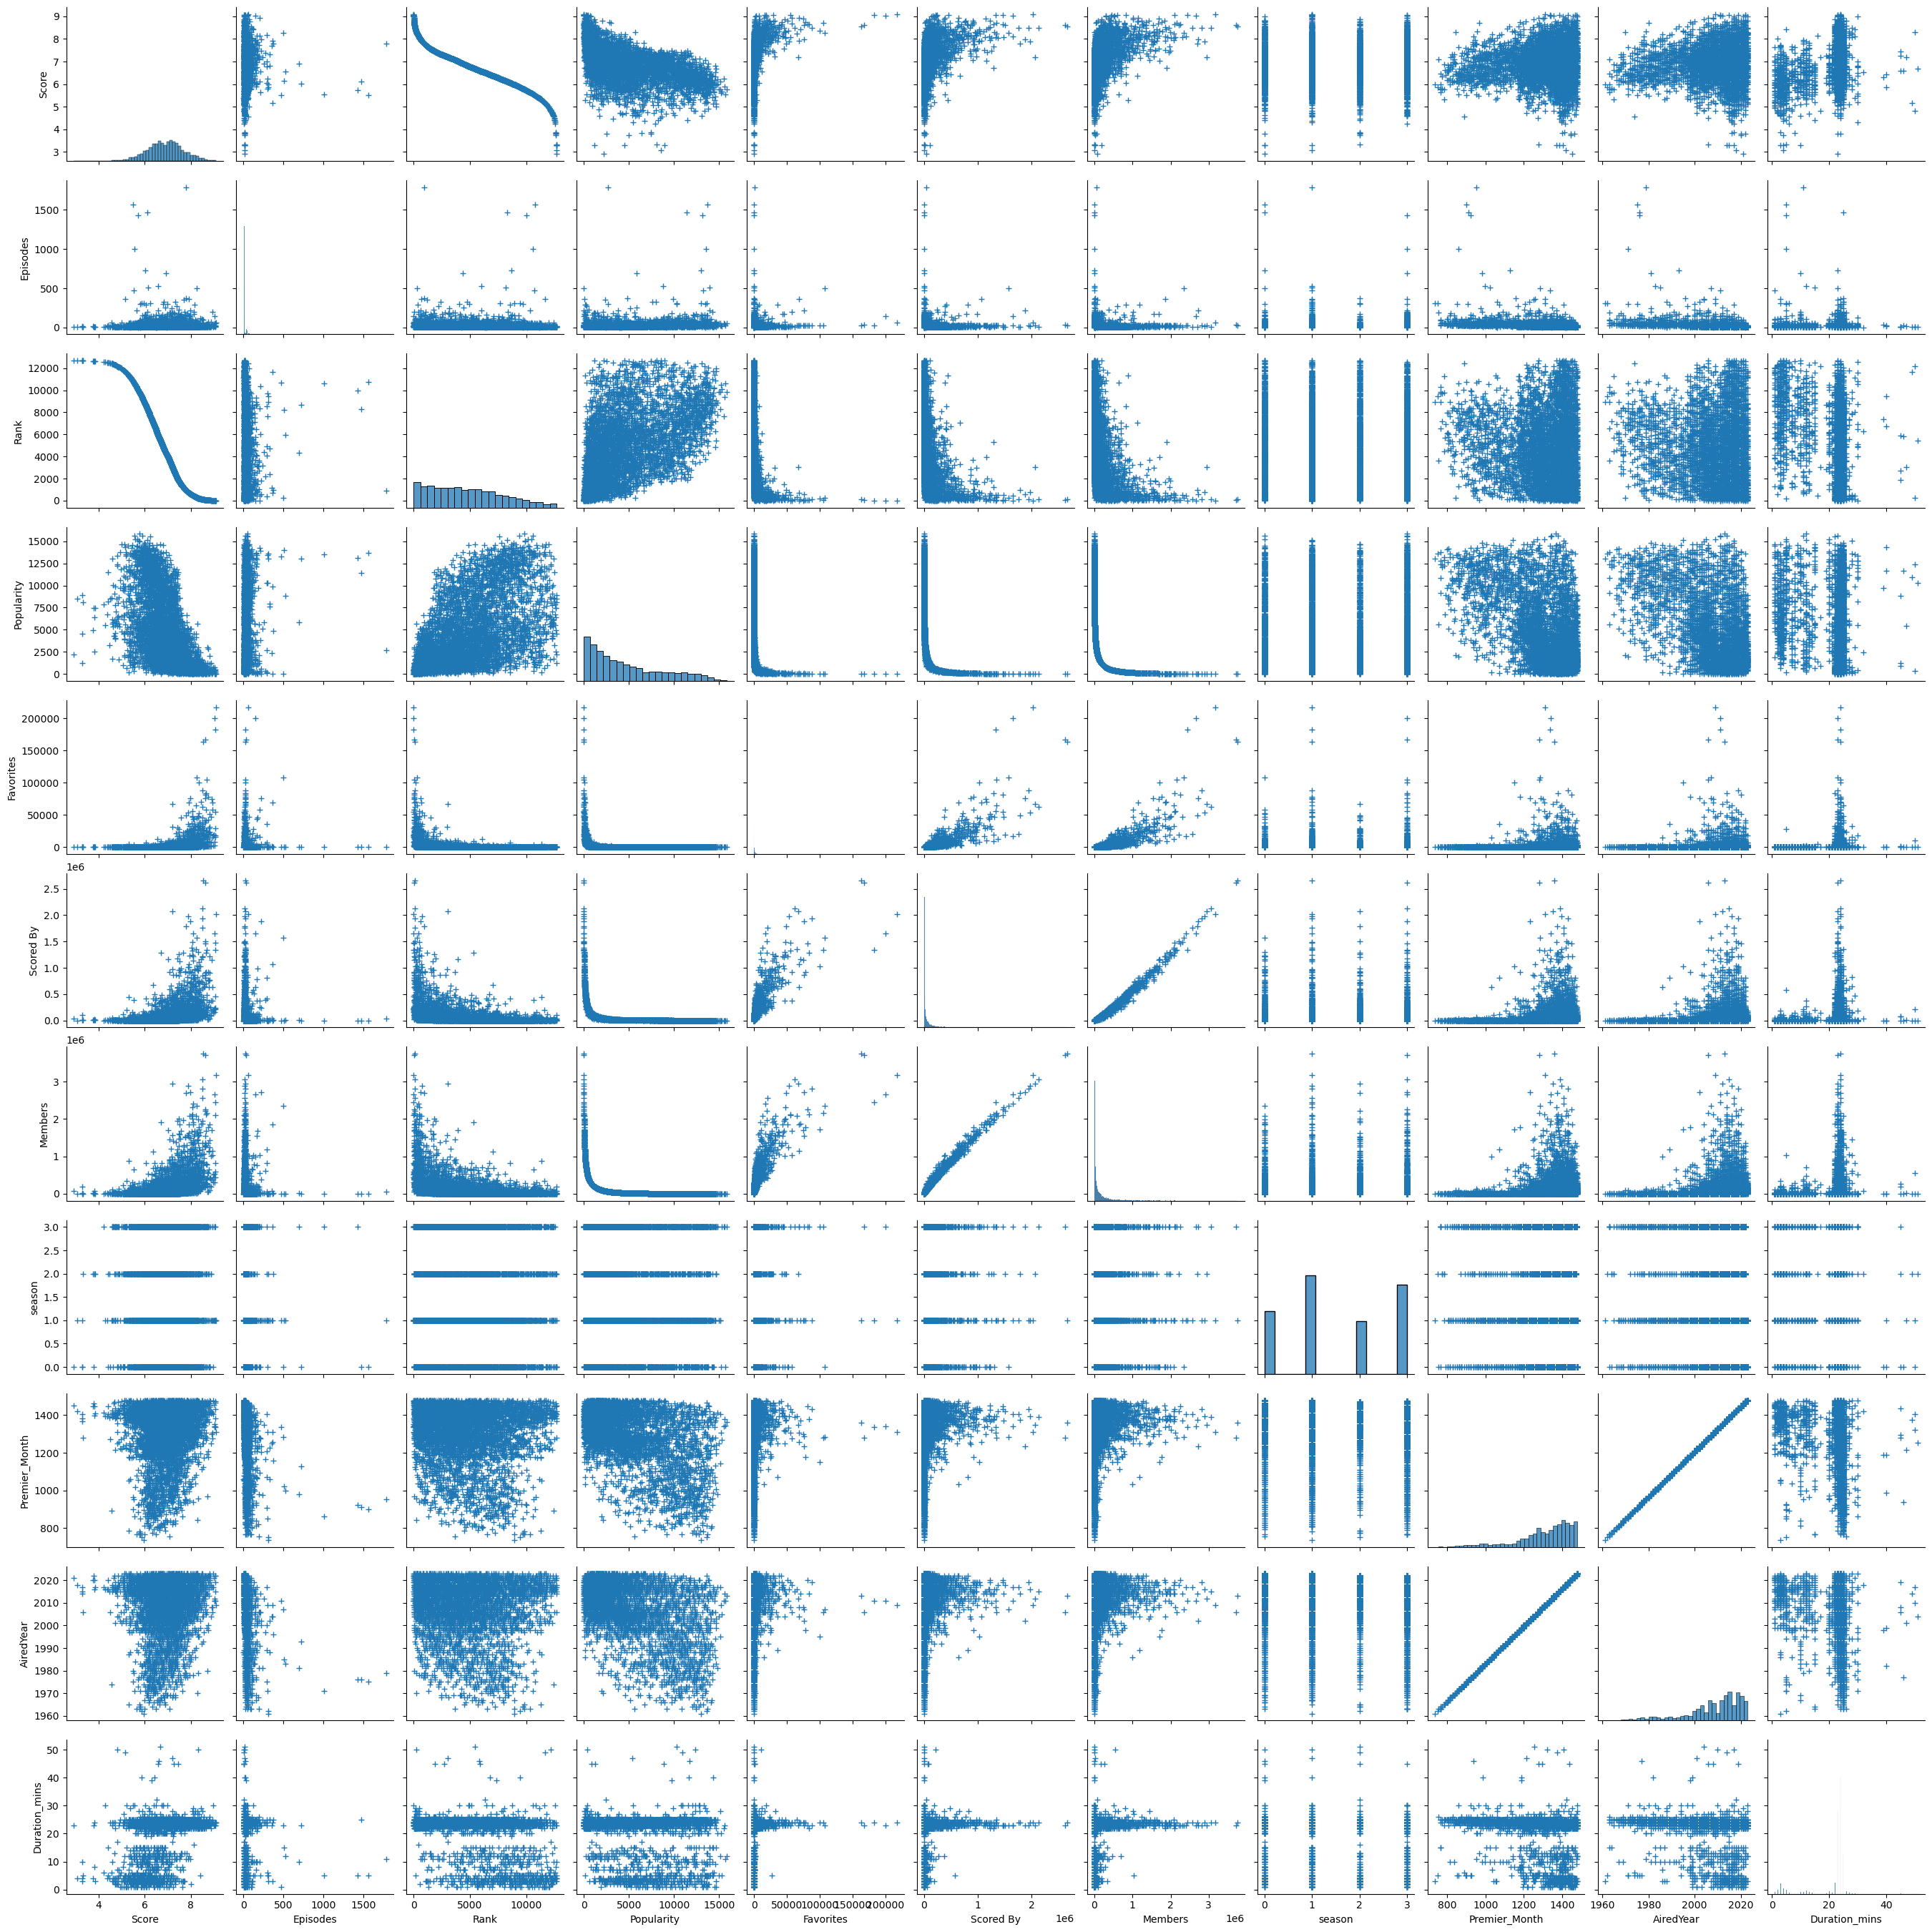

In [67]:
sb.pairplot(data = numdf, plot_kws=dict(marker="+", linewidth=1))

can we predict the score of the series using variables: 'Episodes', 'Popularity', 'Favourites', 'AiredYear', 'Duration_mins' 
which variable is the best in predicting score based on correlation

               anime_id     Score  Episodes      Rank  Popularity  Favorites  \
anime_id       1.000000 -0.055162 -0.150654  0.075806   -0.262241   0.017022   
Score         -0.055162  1.000000 -0.004872 -0.977496   -0.540284   0.345935   
Episodes      -0.150654 -0.004872  1.000000  0.009722    0.181341   0.042069   
Rank           0.075806 -0.977496  0.009722  1.000000    0.553830  -0.270705   
Popularity    -0.262241 -0.540284  0.181341  0.553830    1.000000  -0.242852   
Favorites      0.017022  0.345935  0.042069 -0.270705   -0.242852   1.000000   
Scored By      0.107350  0.413610 -0.013035 -0.363999   -0.421085   0.795524   
Members        0.132805  0.455565 -0.025364 -0.405229   -0.482115   0.787428   
season        -0.042261  0.028096 -0.006423 -0.029412   -0.005864   0.015554   
Premier_Month  0.733206  0.056572 -0.279753 -0.047466   -0.523527   0.076637   
AiredYear      0.733137  0.056297 -0.279431 -0.047245   -0.523318   0.076174   
Duration_mins -0.165338  0.368925 -0.046

<Axes: >

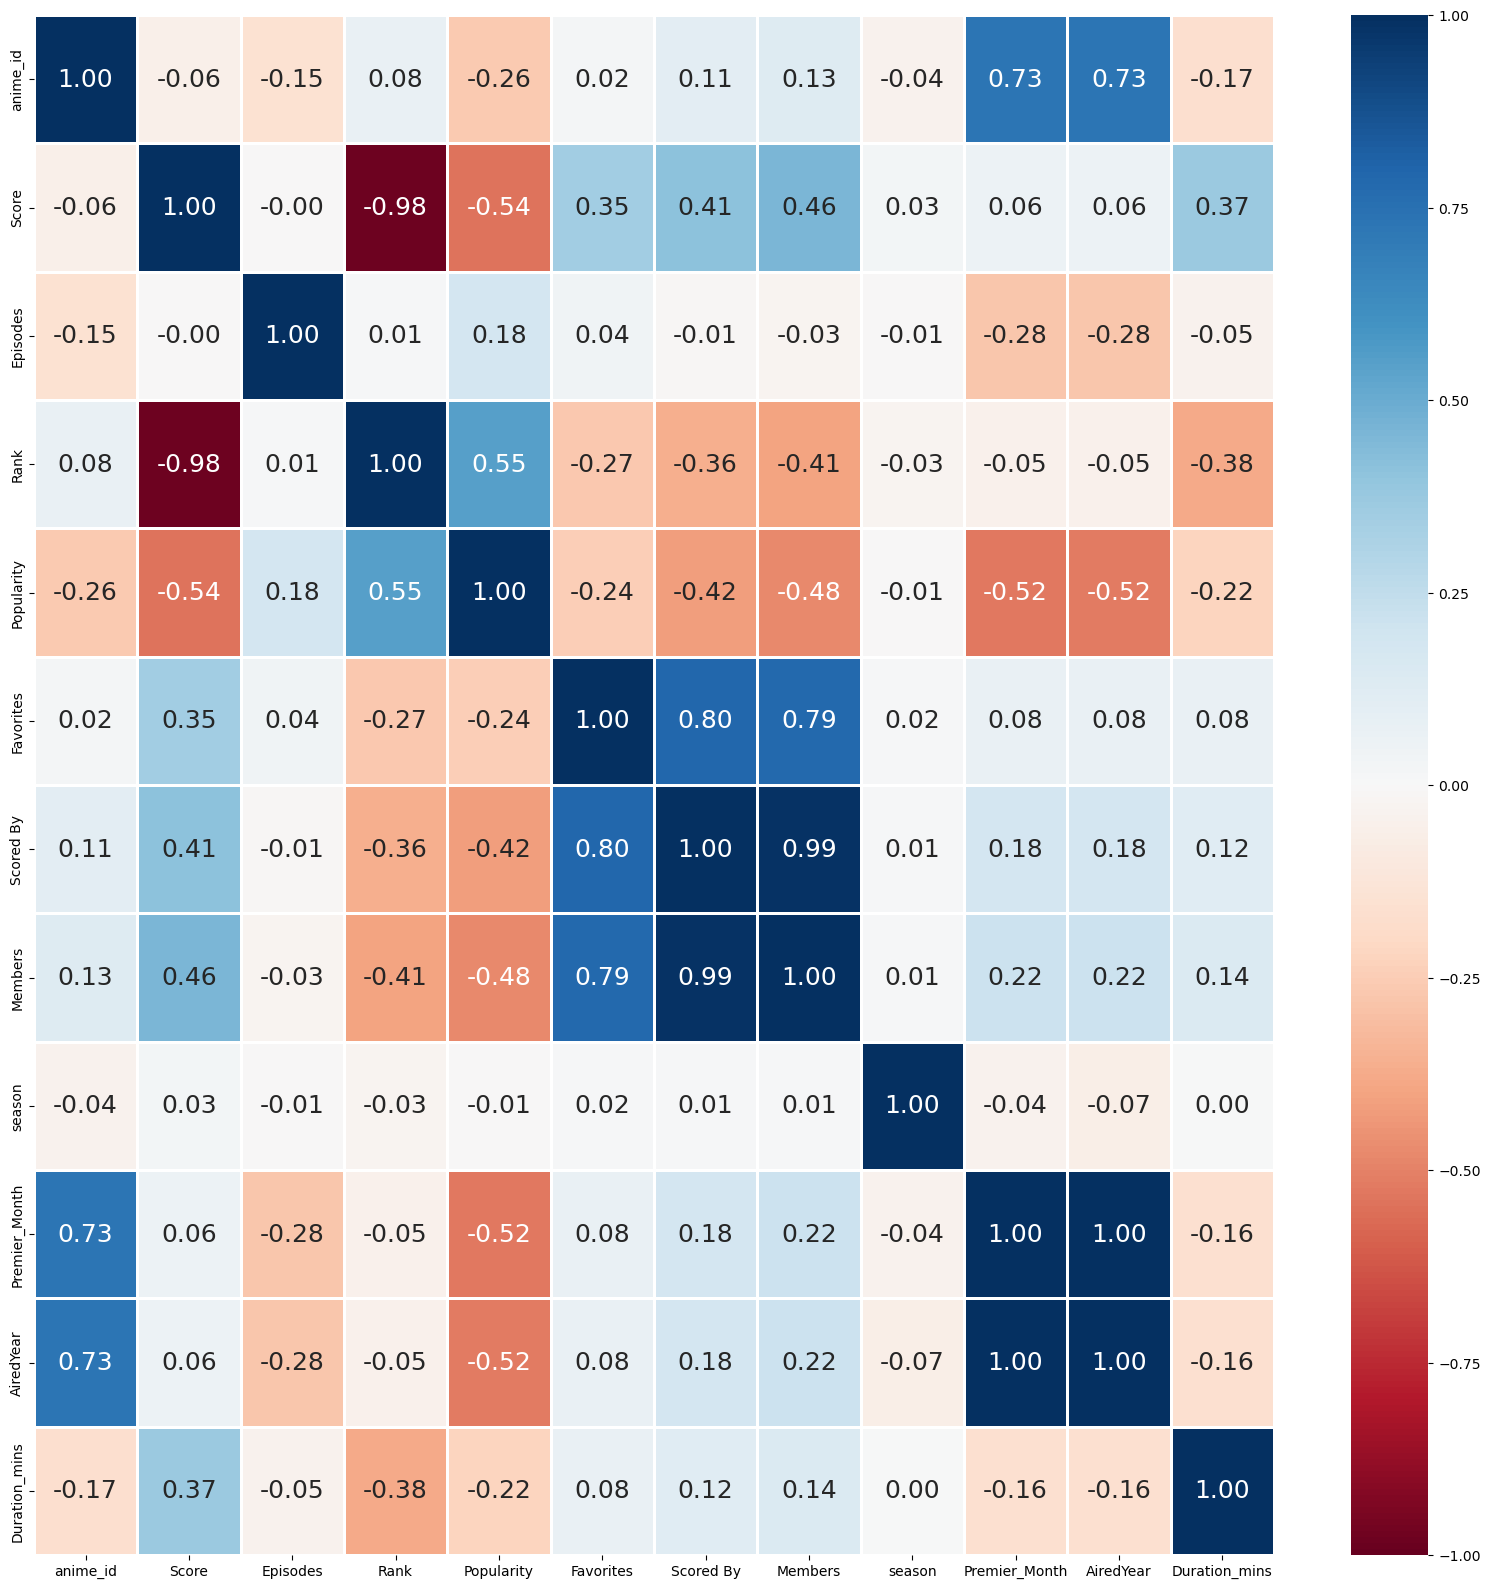

In [16]:
# Correlation Matrix
print(numdf.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numdf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Based on correlation matrix, best numeric variables to preodict Score based on coeffeceint correlation are:
    1. Rank
    2.Popularity
    3.Members
    4.Scored by
    5.Duration_mins
    6.Favourites

In [ ]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_legnd_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
for i in numdf:

    f=plt.figure(figsize=(10,4))
    sb.boxplot(data=numdf[i], orient='h')
